In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

In [5]:
df = pd.read_csv('spambase.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
columns = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
           "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
           "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
           "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
           "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
           "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
           "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
           "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
           "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
           "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
           "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
           "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
           "capital_run_length_longest", "capital_run_length_total", "spam"]

In [7]:
df.columns = columns
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
df['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [10]:
X = df.drop('spam', axis=1).values
Y = df['spam'].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## SVC

In [12]:
model = SVC(C=1)
model.fit(x_train, y_train)

SVC(C=1)

In [13]:
y_preds = model.predict(x_test)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       531
           1       0.66      0.42      0.51       390

    accuracy                           0.66       921
   macro avg       0.66      0.63      0.63       921
weighted avg       0.66      0.66      0.64       921



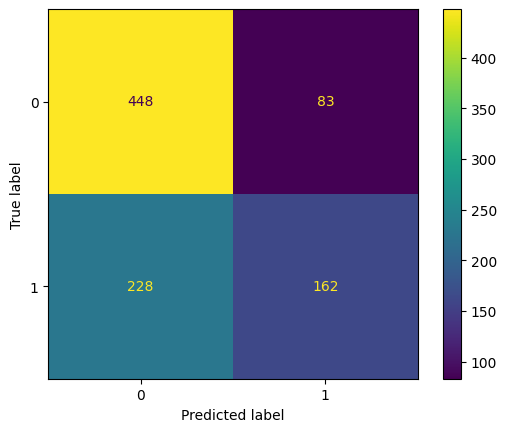

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

### Cross Validation and Grid Search

In [15]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)

model = SVC(C=1)

In [16]:
cv_results = cross_val_score(model, x_train, y_train, cv=folds, scoring='accuracy')

In [17]:
print(cv_results)
print(f"Mean accuracy: {cv_results.mean()}")

[0.69972826 0.71875    0.70244565 0.72690217 0.7201087 ]
Mean accuracy: 0.7135869565217392


In [38]:
params = {
    "C": [0.1, 1, 10, 100, 1000]
}

model = SVC()

model_cv = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring="accuracy",
    cv=folds,
    verbose=3,
    return_train_score=True
  )

In [39]:
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .........C=0.1;, score=(train=0.703, test=0.673) total time=   0.6s
[CV 2/5] END .........C=0.1;, score=(train=0.697, test=0.694) total time=   0.6s
[CV 3/5] END .........C=0.1;, score=(train=0.699, test=0.678) total time=   0.6s
[CV 4/5] END .........C=0.1;, score=(train=0.700, test=0.717) total time=   0.6s
[CV 5/5] END .........C=0.1;, score=(train=0.695, test=0.708) total time=   0.6s
[CV 1/5] END ...........C=1;, score=(train=0.716, test=0.700) total time=   0.5s
[CV 2/5] END ...........C=1;, score=(train=0.713, test=0.719) total time=   0.8s
[CV 3/5] END ...........C=1;, score=(train=0.720, test=0.702) total time=   0.8s
[CV 4/5] END ...........C=1;, score=(train=0.714, test=0.727) total time=   0.5s
[CV 5/5] END ...........C=1;, score=(train=0.727, test=0.720) total time=   0.5s
[CV 1/5] END ..........C=10;, score=(train=0.733, test=0.705) total time=   0.5s
[CV 2/5] END ..........C=10;, score=(train=0.742,

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.452115,0.007589,0.120998,0.002838,0.1,{'C': 0.1},0.672554,0.694293,0.677989,0.717391,...,0.694022,0.017066,5,0.703125,0.697351,0.699389,0.699728,0.695312,0.698981,0.002608
1,0.496322,0.094697,0.151261,0.047010,1,{'C': 1},0.699728,0.718750,0.702446,0.726902,...,0.713587,0.010608,4,0.716033,0.712636,0.719769,0.714334,0.727242,0.718003,0.005189
2,0.407277,0.006561,0.107439,0.001121,10,{'C': 10},0.705163,0.751359,0.721467,0.755435,...,0.731250,0.019165,3,0.733356,0.741508,0.742527,0.741848,0.740489,0.739946,0.003360
3,0.495616,0.074255,0.132665,0.039723,100,{'C': 100},0.808424,0.834239,0.822011,0.819293,...,0.822283,0.008610,2,0.815897,0.827785,0.828804,0.835938,0.831522,0.827989,0.006672
4,0.587205,0.090530,0.085909,0.023644,1000,{'C': 1000},0.904891,0.894022,0.908967,0.884511,...,0.898098,0.008550,1,0.906250,0.911005,0.905910,0.914402,0.912704,0.910054,0.003420


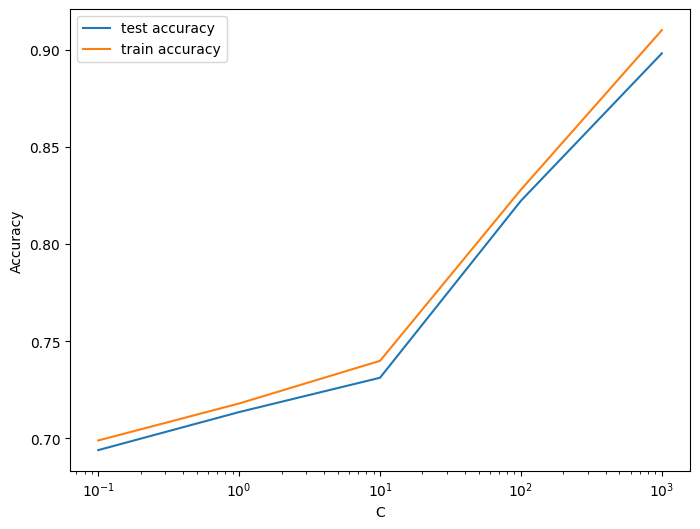

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [42]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(f"The highest test accuracy is {best_score} at C = {best_C}")

The highest test accuracy is 0.8980978260869564 at C = 1000


In [43]:
model = SVC(C=best_C)
model.fit(x_train, y_train)

SVC(C=1000)

In [44]:
y_preds = model.predict(x_test)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       531
           1       0.92      0.85      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921



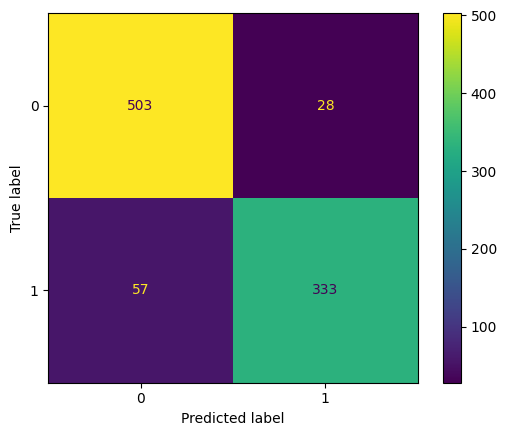

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

## Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_preds = model.predict(x_test)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       531
           1       0.92      0.90      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



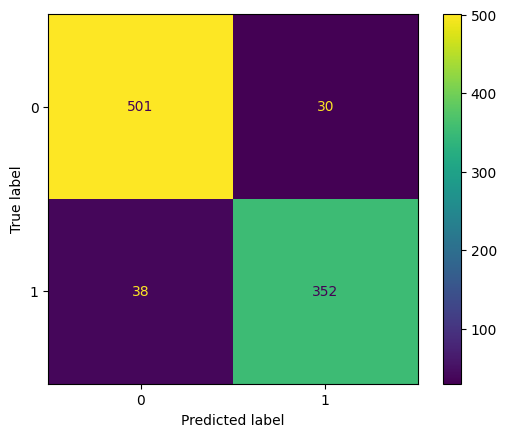

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)